## **Prediction using Supervised ML**
### **Simple Linear Regression**
In this regression task we will predict the percentage of an student based on the number of study hours. 
This is a simple linear regression task as it involves just two variables using Python.

In [42]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# The above command sets the backend of matplotlib to the 'inline' backend. 
# It means the output of plotting commands is displayed inline.

In [43]:
# Import the data
url_data = "http://bit.ly/w-data"
df = pd.read_csv(url_data)
# View the top 5 rows of df
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


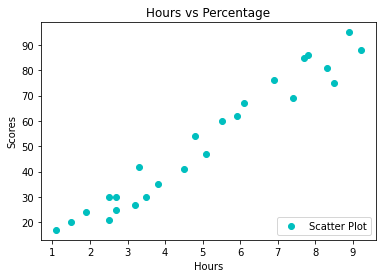

In [44]:
# Declare feature variable and target variable

X = df['Hours'].values
y = df['Scores'].values

# Plot scatter plot between X and y

plt.scatter(X, y, color = 'c', label='Scatter Plot')
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.show()

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [45]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

### **Train test split**
I split the dataset into two sets namely - train set and test set.

The model learn the relationships from the training data and predict on test data.

In [46]:
# Split X and y into training and test data sets

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Mechanics of the model**
I split the dataset into two sets – the training set and the test set. Then, I instantiate the regressor lm and fit it on the training set with the fit method.

In this step, the model learned the relationships between the training data (X_train, y_train).

In [47]:
# Fit the linear model

# Instantiate the linear regression object lm
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
# Train the model using training data sets
results = lm.fit(X_train, y_train) 

In [48]:
print(results.intercept_, results.coef_)

2.018160041434683 [9.91065648]


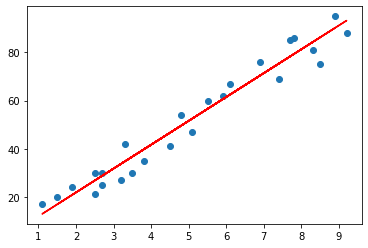

In [49]:
# Plotting the regression line

line = results.coef_*X+results.intercept_

# Plotting for the test data

plt.scatter(X, y)
plt.plot(X, line, c='r');
plt.show()

### **Making Predictions**

Now that we have trained our algorithm, it's time to make some predictions.
To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. To make pre-dictions on the test data, execute the following script:

In [50]:
print(X_test)
y_pred = lm.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [51]:
#To compare the actual output values for X_test with the predicted values, execute the following script:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [52]:
# You can also test with your own data
hours = np.array(9.25).reshape(1, 1)
own_pred = lm.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


### **Evaluating the Algorithm**
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

In [53]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))
rmse = np.sqrt(mse)
print("Root Mean Squared Error: {:.4f}".format(rmse))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474
